[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tesouro/curso_basico_python/blob/main/Aula%207%20-%20Coletando%20dados.ipynb)

# Aula 7 - Coletando dados

Nessa aula temos dois objetivos: aprender a coletar dados da internet através de duas abordagens principais: consumindo APIs (a forma estruturada e oficial) e fazendo Web Scraping (quando uma API não está disponível).

<div class="alert alert-block alert-info" style="border-left: 5px solid #0056b3;">
    <h4>🎯 Objetivos de Aprendizagem da Aula</h4>
    <ul style="margin-left: 20px;">
    <li>Entender o que é uma API (Interface de Programação de Aplicações) e por que ela é importante.</li>
    <li>Usar a biblioteca requests para fazer chamadas (requisições) a APIs.</li>    
    <li>Compreender e processar o formato de dados JSON.</li>
    <li>Conhecer a ética envolvida no Web Scraping e a importância do arquivo robots.txt.</li>
    <li>Utilizar a biblioteca BeautifulSoup para "entender" e navegar pelo HTML.</li>
    <li>Encontrar elementos específicos em uma página HTML por tags, classes e IDs.</li>
    </ul>
</div>

## 1. O que é uma API? 
Imagine que você precisa de informações de um sistema, por exemplo, os dados da cotação do dólar do Banco Central. Como você os obteria?

Você tem, em teoria, duas opções principais:

- Invadir a "cozinha" (o banco de dados do sistema): Seria como entrar no site do Banco Central e baixar a informação (manualmente ou programaticamente);

- Chamar o "garçom" (a API): Esta é a forma correta e segura. Você faz um pedido estruturado para o "garçom" do sistema, e ele traz exatamente o que você pediu em um "prato limpo" e padronizado.

Uma API (Interface de Programação de Aplicações) é exatamente esse "garçom" no mundo da programação. Pense nela como um conjunto de regras e "endpoints" (URLs específicas) que um provedor de dados (como o Banco Central, a BrasilAPI, etc.) cria. Essas regras permitem que outros programas (como o seu script Python) possam solicitar e receber informações de forma padronizada, organizada e, o mais importante, segura e oficial.

Essa é uma distinção muito importante para a coleta de dados. Sempre que disponível, prefira usar uma API!

- Por que? Porque a API é a "porta da frente" oficial. Os dados vêm formatados, organizados, e o provedor espera que você os utilize dessa forma. É a maneira mais confiável, eficiente e ética.

O Web Scraping é o "Plano B", porque é mais frágil (sempre que o site tiver alguma alteração estruturante, você provavelmente precisará alterar o seu script).

### 1.1. Como consumir uma API
Consumir uma API geralmente segue um fluxo de três passos muito lógicos, quase como fazer um pedido em um restaurante:

    Fazer a Requisição (O Pedido):

- Você usa uma ferramenta (no nosso caso, a biblioteca requests do Python) para "chamar" a URL específica da API (o endpoint). É como dizer ao garçom: "Quero o prato de feriados nacionais de 2025, por favor!".

    Receber a Resposta em JSON (O Prato Pronto):

- A maioria das APIs modernas entrega os dados em um formato chamado JSON (JavaScript Object Notation). Não se assuste com o nome! É simplesmente um formato de texto leve e legível por humanos e máquinas, muito, mas muito parecido com os dicionários e listas que você já conhece em Python. Ele é perfeito para representar dados estruturados.

    Processar os Dados (Aproveitar a Refeição):

- Uma vez que você recebe a resposta em JSON, o Python tem ferramentas para converter esse texto JSON em objetos Python normais (listas de dicionários, por exemplo). A partir daí, você pode manipular esses dados como qualquer outra estrutura de dados Python que você já aprendeu: filtrá-los, acessá-los, transformá-los e, claro, colocá-los em um DataFrame do Pandas para análises mais complexas.

Vamos colocar a mão na massa! Usaremos a BrasilAPI, que é uma API pública e gratuita com diversos dados brasileiros, para consultar os feriados nacionais de 2025.

Primeiro, precisamos garantir que as bibliotecas necessárias estão instaladas. Usamos !pip install para instalar diretamente no ambiente do notebook. O -q é para "quiet", ou seja, instalar sem mostrar muitas mensagens na tela.

In [ ]:
# Instalando as bibliotecas necessárias
#!pip install requests beautifulsoup4 pandas -q

Agora, vamos fazer nosso "pedido" à API:

In [ ]:
import urllib3

# Desabilita o aviso InsecureRequestWarning
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
 

In [ ]:
import requests

# Esta é a 'URL' ou 'endpoint' para onde faremos nosso pedido.
url_feriados = "https://brasilapi.com.br/api/feriados/v1/2025"

print(f"Fazendo a requisição GET para: {url_feriados}")
# A função requests.get() envia o pedido e espera pela resposta.
response = requests.get(url_feriados, verify=False)

# O objeto 'response' contém a resposta completa do servidor.
print(f"Tipo do objeto resposta: {type(response)}")

A maioria das APIs modernas entrega os dados em um formato chamado JSON (JavaScript Object Notation). Não se assuste com o nome! É simplesmente um formato de texto leve e legível por humanos e máquinas.

A melhor parte: ele é muito, mas muito parecido com os dicionários e listas que você já conhece em Python! Ele é perfeito para representar dados estruturados.

In [ ]:
# Continuar do exemplo anterior com 'response'
# É uma boa prática verificar o status da resposta antes de tentar processá-la.
# Um código 200 significa "OK", a requisição foi bem-sucedida.
if response.status_code == 200:
    print(f"\nRequisição bem-sucedida! Status Code: {response.status_code}")

    # O método .json() do objeto response converte automaticamente o texto JSON
    # para um objeto Python (geralmente uma lista de dicionários ou um dicionário).
    dados_feriados = response.json()

    print(f"Tipo de dado retornado (após .json()): {type(dados_feriados)}")
    print(f"Exemplo do conteúdo JSON (primeiros 200 caracteres):\n{str(dados_feriados)[:200]}...")
else:
    print(f"\nErro na requisição! Status Code: {response.status_code}")
    print(f"Mensagem do servidor:\n{response.text}")

Uma vez que você recebe a resposta em JSON e a converte para um objeto Python (usando .json()), você pode manipular esses dados como qualquer outra estrutura de dados Python: filtrá-los, acessá-los, transformá-los.

E o melhor: você pode facilmente colocá-los em um DataFrame do Pandas para análises mais complexas e organização tabular.

In [ ]:
import pandas as pd # Importamos pandas para trabalhar com DataFrames

# Continuar do exemplo anterior, assumindo que 'dados_feriados' é uma lista de dicionários
if 'dados_feriados' in locals() and isinstance(dados_feriados, list): # Verifica se dados_feriados existe e é uma lista
    print(f"\nTotal de feriados em 2025: {len(dados_feriados)}")

    # Vamos ver a estrutura do primeiro feriado para entender como acessar os dados
    if dados_feriados: # Verifica se a lista não está vazia
        primeiro_feriado = dados_feriados[0]
        print(f"\nEstrutura do Primeiro Feriado:\n{primeiro_feriado}")
        print(f"Nome do primeiro feriado: **{primeiro_feriado['name']}**")
        print(f"Data do primeiro feriado: **{primeiro_feriado['date']}**")

        # Transformando a lista de dicionários em um DataFrame do Pandas
        df_feriados = pd.DataFrame(dados_feriados)
        print("\nFeriados de 2025 em uma Tabela do Pandas:")
        display(df_feriados.head()) # Usamos .head() para mostrar apenas as primeiras linhas
        print(f"Colunas do DataFrame: {df_feriados.columns.tolist()}")
        print(f"Dimensões do DataFrame: {df_feriados.shape}")
    else:
        print("A lista de feriados está vazia.")
else:
    print("Dados de feriados não foram obtidos ou não estão no formato esperado.")

Análise dos Resultados:

- Observe que a API nos devolveu uma lista (<class 'list'>). Cada item dessa lista é um dicionário, representando um feriado específico.

- Dentro de cada dicionário de feriado, temos chaves como date, name e type. Isso mostra a estrutura organizada que as APIs fornecem!

- Ao transformar em um DataFrame do Pandas, cada dicionário vira uma linha, e as chaves viram as colunas. Isso é o poder da API e do Pandas juntos para organizar dados!

## 1.2. Exercício de fixação

Consulta de Endereço por CEP
Faça um programa que pede um CEP ao usuário, consulta a BrasilAPI e imprime o endereço formatado: "Rua..., Bairro..., Cidade... - UF...".

Endpoint da API: https://brasilapi.com.br/api/cep/v1/{cep} (substitua {cep} pelo CEP digitado).

In [ ]:
import requests
 
# Esta é a 'URL' ou 'endpoint' para onde faremos nosso pedido.

cep = str(input("digite o CEP"))

url_cep = "https://brasilapi.com.br/api/cep/v1/"+cep
 
print(f"Fazendo a requisição GET para: {url_cep}")

# A função requests.get() envia o pedido e espera pela resposta.

response = requests.get(url_cep, verify=False)

# O objeto 'response' contém a resposta completa do servidor.

print(f"Tipo do objeto resposta: {type(response)}")
 
 
dados_cep = response.json()

print(dados_cep)
 
df_cep = pd.DataFrame([dados_cep])

df_cep.head()
 

O Banco Central do Brasil (BCB) oferece uma API para consultar a cotação do dólar. Faça uma função que recebe uma data no formato "MM-DD-YYYY" e retorna a cotação de compra e venda do dólar para aquele dia.

Endpoint da API do BCB: https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao='{data}'&$format=json

## 1.3. Como fazer webscraping?

Quando uma API não está disponível, a alternativa é o Web Scraping. Mas lembre-se: essa é a "porta dos fundos" e exige cuidado e responsabilidade.

Antes de sequer pensar em coletar dados de um site via Web Scraping, você deve sempre se perguntar:

- É permitido?

- É ético?

A primeira coisa a fazer é verificar o arquivo robots.txt do site.

- O que é o robots.txt? Imagine que é um cartaz na "porta dos fundos" do site, indicando para os "robôs" (como o seu script de scraping) quais áreas do site eles podem ou não podem acessar. É uma convenção para os webmasters informarem suas preferências de acesso.

- Como verificar? Basta adicionar /robots.txt ao final da URL base do site. Por exemplo, para o Yahoo Finance, seria https://finance.yahoo.com/robots.txt.

- Por que é importante? Ignorar o robots.txt ou os termos de serviço de um site pode ter consequências sérias, desde o bloqueio do seu IP até ações legais. Sempre respeite as regras! O uso excessivo ou indevido pode sobrecarregar os servidores do site.

Para realizarmos o webscraping, utilizamos duas ferramentas principais:

- requests: Usamos esta biblioteca para agir como um navegador e "baixar" o conteúdo HTML de uma URL. O resultado é um grande bloco de texto.

- BeautifulSoup: Esta biblioteca pega o HTML "cru" do requests e o transforma em um objeto organizado, uma "sopa" de tags que podemos navegar e pesquisar facilmente.

Vamos pegar um pedaço simples de HTML e ver como o BeautifulSoup o "entende":

In [ ]:
from bs4 import BeautifulSoup

# Imagine que isso é o HTML que você obteve com requests.get().text
html_doc = """
<html>
<head>
    <title>Minha Página Simples</title>
</head>
<body>
    <h1>Bem-vindo!</h1>
    <p class="introducao">Este é um parágrafo de introdução.</p>
    <a href="https://example.com" id="link_principal">Clique aqui</a>
    <p>Outro parágrafo.</p>
</body>
</html>
"""

# Criando o objeto BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

print(f"Tipo do objeto soup: {type(soup)}")
# Podemos ver uma versão formatada do HTML que o BeautifulSoup "enxerga":
print("\n--- HTML formatado pelo BeautifulSoup ---")
print(soup.prettify())
print("------------------------------------------")

# Acessando o título da página
titulo = soup.title
print(f"Título da página (tag): {titulo}")
print(f"Texto do título da página: {titulo.text}")

# Acessando o primeiro h1
h1 = soup.h1
print(f"Primeiro H1: {h1.text}")

### 1.4. Encontrando Elementos por Tag (find() e find_all())

Você pode querer encontrar todos os parágrafos, todos os links, ou todos os títulos.

Exemplo: Encontrando todas as tags <span> na página:

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "http://quotes.toscrape.com/"
response = requests.get(url)
response.raise_for_status() # Verifica se a requisição foi bem-sucedida
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrando o primeiro <span>
primeiro_span = soup.find('span')
print(f"Primeiro <span> encontrado: {primeiro_span.text}")

# Encontrando todos os <span>
todos_spans = soup.find_all('span')
print(f"\nTotal de <span>s encontrados: {len(todos_spans)}")

# Vamos imprimir os 5 primeiros para ter uma ideia
print("Os 5 primeiros <span>s:")
for i, span in enumerate(todos_spans[:5]):
    print(f"  {i+1}. {span.text}")

# Você pode usar 'limit' em find_all para pegar apenas os N primeiros
primeiros_3_spans = soup.find_all('span', limit=3)
print(f"\nOs 3 primeiros <span>s usando limit:")
for span in primeiros_3_spans:
    print(f"  - {span.text}")

### 1.5. Encontrando Elementos por Classe (class_)

Muitos elementos HTML possuem um atributo class para agrupar elementos que compartilham estilo ou funcionalidade. No BeautifulSoup, usamos class_ (com underline) para não confundir com a palavra reservada class do Python.

Exemplo: Encontrando todas as citações (que têm class="text")

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "http://quotes.toscrape.com/"
response = requests.get(url)
response.raise_for_status()
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrando todos os elementos <span> que têm a classe "text"
citacoes = soup.find_all('span', class_='text')

print(f"Total de citações (textos) encontradas: {len(citacoes)}")

print("\n--- Primeiras 3 Citações ---")
for i, citacao in enumerate(citacoes[:3]):
    print(f"  {i+1}. \"{citacao.text}\"")

# Encontrando todos os autores (que têm a classe "author")
autores = soup.find_all('small', class_='author')

print(f"\nTotal de autores encontrados: {len(autores)}")

print("\n--- Primeiros 3 Autores ---")
for i, autor in enumerate(autores[:3]):
    print(f"  {i+1}. {autor.text}")

### 1.6. Encontrando Elementos por ID (id)

O atributo id é usado para identificar um elemento único na página. No BeautifulSoup, você o usa diretamente como um argumento nomeado.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.scrapethissite.com/pages/simple/"

response = requests.get(url)
response.raise_for_status() # Garante que a requisição foi bem-sucedida (status 200)
soup = BeautifulSoup(response.text, 'html.parser')

elemento_por_id = soup.find(id='nav-homepage') # Procura qualquer tag com id="header"
print(elemento_por_id)

### 1.7. Exercícios de fixação

Colete as tags da primeira citação (no caso, "change", "deep thoughts", "thinking", "world")

Dica: veja o que os elementos possuem em comum entre si.
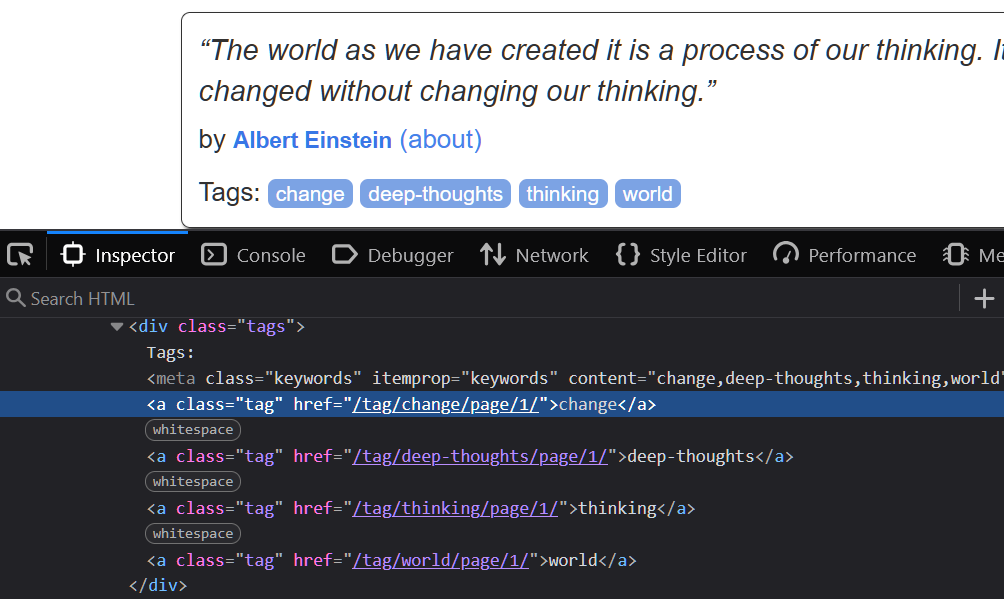

Pegue as tags de todas as citações da página.

Faça um gráfico de barras com a distribuição de frequência das citações.

## 2. Exercícios

1. Acesse a página http://books.toscrape.com/. Colete todos os preços de todos os livros e veja qual é o livro mais caro e o livro mais barato.


2. Na mesma página http://books.toscrape.com/, veja qual é a média de avaliações de todos os livros.


3. Na página http://quotes.toscrape.com/, verifique qual é a tag mais comum de todas as citações.


4. No mesmo site http://quotes.toscrape.com/, veja quais são as palavras mais frequentemente usadas entre todas as citações presentes.


5. No site https://finance.yahoo.com/trending-tickers, transforme os dados em uma tabela offline no formato .csv.


## 3. Bug Hunt
Os códigos abaixo possuem algum tipo de problema. Leia o código e a mensagem de erro atentamente e tente solucionar o bug!
Descreva o erro e a solução com suas próprias palavras.

1. Eu gostaria de pegar o título dessa página
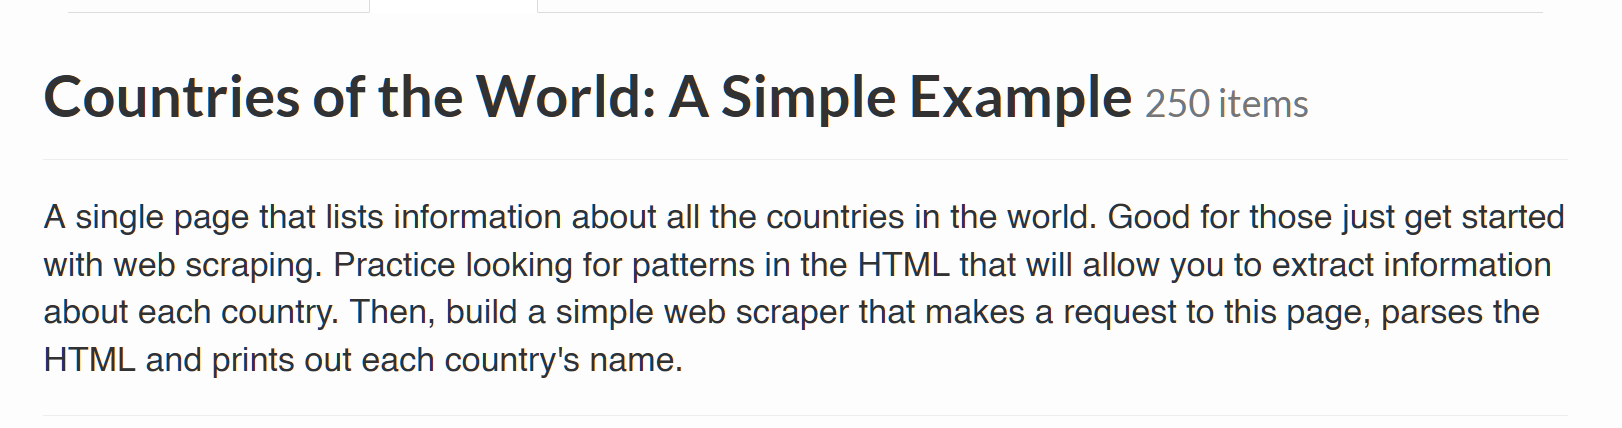

In [ ]:
from bs4 import BeautifulSoup
import requests

# URL de um site de exemplo com uma estrutura simples
url = "https://www.scrapethissite.com/pages/simple/" # Site de exemplo para scraping

response = requests.get(url, verify=False)
response.raise_for_status()
soup = BeautifulSoup(response.text, 'html.parser')

element = soup.find('h1', class_='page-header')

print(element)

Eu gostaria de coletar esses dados tabulares.
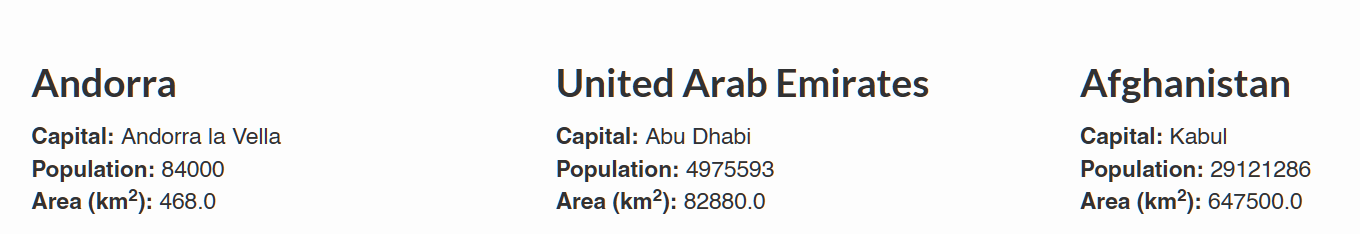

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

url = "https://www.scrapethissite.com/pages/simple/" # Site com tabela de exemplo

response = requests.get(url, verify=False)
response.raise_for_status()
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', class_='table') 
print(table)

## 4. Projetos para você fazer

Pensem em um portal governamental, diário oficial ou site de notícias que vocês consultam para obter dados, mas que não oferece uma opção de "Exportar para Excel/CSV". Descrevam o passo a passo que vocês seguiriam (usando requests, BeautifulSoup e o Inspetor do Navegador) para extrair uma tabela de dados dessa página e transformá-la em algo que o pandas possa ler.

## 5. Perguntas para discussão em grupo

Considerando a manutenção do código, qual das duas abordagens (APIs vs webscraping) tende a ser mais robusta a longo prazo e por quê? 

Como vocês lidariam com um cenário em que precisam de dados cruciais para o trabalho, mas o robots.txt proíbe o scraping? Quais seriam as alternativas éticas e profissionais para obter esses dados?

## 6. Sugestões de pesquisa

1) Explore como lidar com autenticação básica (Basic Auth) e autenticação baseada em tokens (Bearer Token) ao consumir APIs usando a biblioteca requests. Procure por exemplos de APIs que exigem autenticação e tente fazer uma requisição.

2) Aprofunde-se no tratamento de exceções (try-except) para requests. Pesquise sobre as diferentes exceções que requests pode levantar (ConnectionError, Timeout, HTTPError, TooManyRedirects) e como tratá-las de forma específica para tornar seu scraper mais robusto.

3. Pesquise sobre a biblioteca Selenium e quais são suas vantagens de uso em comparação ao BeautifulSoup